In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor
import statsmodels.api as sm
from pylab import rcParams
import warnings
import itertools
from sklearn.linear_model import LinearRegression


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [292]:
!pip install kaggle

In [293]:
from google.colab import files
uploaded = files.upload()

Saving climbing_statistics.csv to climbing_statistics (6).csv
Saving Rainier_Weather.csv to Rainier_Weather (6).csv


In [0]:
data_climb = pd.read_csv('climbing_statistics.csv')
data_weather = pd.read_csv('Rainier_Weather.csv')

In [295]:
data_climb.head()

,Date,Route,Attempted,Succeeded,Success Percentage
0,11/27/2015,Disappointment Cleaver,2,0,0.0
1,11/21/2015,Disappointment Cleaver,3,0,0.0
2,10/15/2015,Disappointment Cleaver,2,0,0.0
3,10/13/2015,Little Tahoma,8,0,0.0
4,10/9/2015,Disappointment Cleaver,2,0,0.0


In [296]:
data_weather.head()

,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,12/31/2015,13.845000,19.062917,21.870833,21.977792,62.325833,84.915292
1,12/30/2015,13.822917,14.631208,18.493833,3.540542,121.505417,86.192833
2,12/29/2015,13.834583,6.614292,34.072917,0.000000,130.291667,85.100917
3,12/28/2015,13.710417,8.687042,70.557917,0.000000,164.683750,86.241250
4,12/27/2015,13.362500,14.140417,95.754167,0.000000,268.479167,31.090708


In [297]:
data_climb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077 entries, 0 to 4076
Data columns (total 5 columns):
Date                  4077 non-null object
Route                 4077 non-null object
Attempted             4077 non-null int64
Succeeded             4077 non-null int64
Success Percentage    4077 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 159.4+ KB


In [298]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 7 columns):
Date                     464 non-null object
Battery Voltage AVG      464 non-null float64
Temperature AVG          464 non-null float64
Relative Humidity AVG    464 non-null float64
Wind Speed Daily AVG     464 non-null float64
Wind Direction AVG       464 non-null float64
Solare Radiation AVG     464 non-null float64
dtypes: float64(6), object(1)
memory usage: 25.5+ KB


In [299]:
data_climb.Date.drop_duplicates().count()

391

In [0]:
data_climb['Date'] = pd.to_datetime(data_climb['Date'])

In [301]:
data_weather['Date'] = pd.to_datetime(data_weather['Date'])
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 7 columns):
Date                     464 non-null datetime64[ns]
Battery Voltage AVG      464 non-null float64
Temperature AVG          464 non-null float64
Relative Humidity AVG    464 non-null float64
Wind Speed Daily AVG     464 non-null float64
Wind Direction AVG       464 non-null float64
Solare Radiation AVG     464 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 25.5 KB


In [302]:
data_weather.head()

,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,2015-12-31,13.845000,19.062917,21.870833,21.977792,62.325833,84.915292
1,2015-12-30,13.822917,14.631208,18.493833,3.540542,121.505417,86.192833
2,2015-12-29,13.834583,6.614292,34.072917,0.000000,130.291667,85.100917
3,2015-12-28,13.710417,8.687042,70.557917,0.000000,164.683750,86.241250
4,2015-12-27,13.362500,14.140417,95.754167,0.000000,268.479167,31.090708


In [303]:
data_weather['Date'].max()

Timestamp('2015-12-31 00:00:00')

In [0]:
data_climb['Date'] = pd.to_datetime(data_climb['Date'])

In [305]:
data_climb.info()
data_climb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077 entries, 0 to 4076
Data columns (total 5 columns):
Date                  4077 non-null datetime64[ns]
Route                 4077 non-null object
Attempted             4077 non-null int64
Succeeded             4077 non-null int64
Success Percentage    4077 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 159.4+ KB


,Date,Route,Attempted,Succeeded,Success Percentage
0,2015-11-27,Disappointment Cleaver,2,0,0.0
1,2015-11-21,Disappointment Cleaver,3,0,0.0
2,2015-10-15,Disappointment Cleaver,2,0,0.0
3,2015-10-13,Little Tahoma,8,0,0.0
4,2015-10-09,Disappointment Cleaver,2,0,0.0


In [306]:
s=data_climb.groupby(['Date'])[ 'Attempted' , 'Succeeded' , 'Success Percentage'].agg({'Attempted' :'sum' ,'Succeeded' :'sum' ,'Success Percentage':'mean' , 'Route' : lambda x:x.value_counts().index[0]}).sort_values(by = 'Attempted' , ascending=False)

/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


In [307]:

print(s)

            Attempted  Succeeded  Success Percentage                   Route
Date                                                                        
2014-07-11        215        138            0.625312  Disappointment Cleaver
2014-07-25        207        100            0.480174  Disappointment Cleaver
2015-06-27        193         65            0.406863  Disappointment Cleaver
2015-06-26        193         84            0.422222  Disappointment Cleaver
2015-07-03        186         93            0.511754  Disappointment Cleaver
...               ...        ...                 ...                     ...
2015-02-13          2          0            0.000000         Fuhrer's Finger
2015-03-08          2          2            1.000000           Little Tahoma
2015-03-19          2          0            0.000000  Disappointment Cleaver
2015-11-27          2          0            0.000000  Disappointment Cleaver
2014-10-06          1          0            0.000000  Disappointment Cleaver

In [0]:
s['Success Percentage'] = s['Succeeded'] / s['Attempted']

In [309]:
print(s)

            Attempted  Succeeded  Success Percentage                   Route
Date                                                                        
2014-07-11        215        138            0.641860  Disappointment Cleaver
2014-07-25        207        100            0.483092  Disappointment Cleaver
2015-06-27        193         65            0.336788  Disappointment Cleaver
2015-06-26        193         84            0.435233  Disappointment Cleaver
2015-07-03        186         93            0.500000  Disappointment Cleaver
...               ...        ...                 ...                     ...
2015-02-13          2          0            0.000000         Fuhrer's Finger
2015-03-08          2          2            1.000000           Little Tahoma
2015-03-19          2          0            0.000000  Disappointment Cleaver
2015-11-27          2          0            0.000000  Disappointment Cleaver
2014-10-06          1          0            0.000000  Disappointment Cleaver

In [310]:
s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 391 entries, 2014-07-11 to 2014-10-06
Data columns (total 4 columns):
Attempted             391 non-null int64
Succeeded             391 non-null int64
Success Percentage    391 non-null float64
Route                 391 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 15.3+ KB


In [0]:
s_merge = pd.merge(right=data_weather  , left = s , how = 'outer', on ='Date')

In [312]:
s_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 650
Data columns (total 11 columns):
Date                     651 non-null datetime64[ns]
Attempted                391 non-null float64
Succeeded                391 non-null float64
Success Percentage       391 non-null float64
Route                    391 non-null object
Battery Voltage AVG      464 non-null float64
Temperature AVG          464 non-null float64
Relative Humidity AVG    464 non-null float64
Wind Speed Daily AVG     464 non-null float64
Wind Direction AVG       464 non-null float64
Solare Radiation AVG     464 non-null float64
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 61.0+ KB


In [313]:
s_merge.head()

,Date,Attempted,Succeeded,Success Percentage,Route,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,2014-07-11,215.0,138.0,0.641860,Disappointment Cleaver,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-07-25,207.0,100.0,0.483092,Disappointment Cleaver,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-06-27,193.0,65.0,0.336788,Disappointment Cleaver,13.443750,54.575833,40.185833,18.146083,278.591667,245.011542
3,2015-06-26,193.0,84.0,0.435233,Disappointment Cleaver,13.433750,53.754167,35.881250,13.615125,276.079167,353.997333
4,2015-07-03,186.0,93.0,0.500000,Disappointment Cleaver,13.423333,55.137500,20.559417,0.753458,90.534583,357.341167


In [0]:
new_pd=s_merge[['Date','Attempted','Succeeded','Success Percentage','Route','Temperature AVG','Relative Humidity AVG','Wind Speed Daily AVG']]

In [315]:
new_pd

,Date,Attempted,Succeeded,Success Percentage,Route,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG
0,2014-07-11,215.0,138.0,0.641860,Disappointment Cleaver,NaN,NaN,NaN
1,2014-07-25,207.0,100.0,0.483092,Disappointment Cleaver,NaN,NaN,NaN
2,2015-06-27,193.0,65.0,0.336788,Disappointment Cleaver,54.575833,40.185833,18.146083
3,2015-06-26,193.0,84.0,0.435233,Disappointment Cleaver,53.754167,35.881250,13.615125
4,2015-07-03,186.0,93.0,0.500000,Disappointment Cleaver,55.137500,20.559417,0.753458
...,...,...,...,...,...,...,...,...
646,2014-10-05,NaN,NaN,NaN,NaN,45.689167,54.463333,3.155875
647,2014-10-03,NaN,NaN,NaN,NaN,41.225833,41.558333,7.457833
648,2014-10-02,NaN,NaN,NaN,NaN,35.380000,53.417083,10.237417
649,2014-10-01,NaN,NaN,NaN,NaN,34.468750,19.050000,14.211333


In [316]:
new_pd.describe()

,Attempted,Succeeded,Success Percentage,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG
count,391.000000,391.000000,391.000000,464.000000,464.000000,464.000000
mean,53.588235,28.265985,0.387511,28.022615,62.548556,13.015701
std,47.195847,31.838790,0.311040,11.898322,28.401976,13.812058
min,1.000000,0.000000,0.000000,-0.165958,9.659917,0.000000
25%,13.000000,0.000000,0.000000,19.074167,38.161458,2.917646
50%,41.000000,19.000000,0.450000,27.355000,64.097708,8.708458
75%,80.000000,45.000000,0.637022,36.115208,91.429167,18.727010
max,215.000000,138.000000,1.231707,56.153750,100.000000,65.853333


In [0]:
new_pd=new_pd.fillna(0)
new_pd["Temperature AVG"] = np.where(new_pd["Temperature AVG"] ==0, 28.022615, new_pd["Temperature AVG"])
new_pd["Relative Humidity AVG"] = np.where(new_pd["Relative Humidity AVG"] ==0, 62.548556, new_pd["Relative Humidity AVG"])
new_pd["Wind Speed Daily AVG"] = np.where(new_pd["Wind Speed Daily AVG"] ==0, 21.17, new_pd["Wind Speed Daily AVG"])

In [331]:
new_pd

,Date,Attempted,Succeeded,Success Percentage,Route,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG
0,2014-07-11,215.0,138.0,0.641860,Disappointment Cleaver,28.022615,62.548556,21.170000
1,2014-07-25,207.0,100.0,0.483092,Disappointment Cleaver,28.022615,62.548556,21.170000
2,2015-06-27,193.0,65.0,0.336788,Disappointment Cleaver,54.575833,40.185833,18.146083
3,2015-06-26,193.0,84.0,0.435233,Disappointment Cleaver,53.754167,35.881250,13.615125
4,2015-07-03,186.0,93.0,0.500000,Disappointment Cleaver,55.137500,20.559417,0.753458
...,...,...,...,...,...,...,...,...
646,2014-10-05,0.0,0.0,0.000000,0,45.689167,54.463333,3.155875
647,2014-10-03,0.0,0.0,0.000000,0,41.225833,41.558333,7.457833
648,2014-10-02,0.0,0.0,0.000000,0,35.380000,53.417083,10.237417
649,2014-10-01,0.0,0.0,0.000000,0,34.468750,19.050000,14.211333


In [0]:
new_df=new_pd[new_pd.Route == 'Disappointment Cleaver']

In [333]:
new_df

,Date,Attempted,Succeeded,Success Percentage,Route,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG
0,2014-07-11,215.0,138.0,0.641860,Disappointment Cleaver,28.022615,62.548556,21.170000
1,2014-07-25,207.0,100.0,0.483092,Disappointment Cleaver,28.022615,62.548556,21.170000
2,2015-06-27,193.0,65.0,0.336788,Disappointment Cleaver,54.575833,40.185833,18.146083
3,2015-06-26,193.0,84.0,0.435233,Disappointment Cleaver,53.754167,35.881250,13.615125
4,2015-07-03,186.0,93.0,0.500000,Disappointment Cleaver,55.137500,20.559417,0.753458
...,...,...,...,...,...,...,...,...
382,2014-01-05,2.0,0.0,0.000000,Disappointment Cleaver,28.022615,62.548556,21.170000
383,2015-01-23,2.0,0.0,0.000000,Disappointment Cleaver,28.251250,92.378750,20.887083
388,2015-03-19,2.0,0.0,0.000000,Disappointment Cleaver,27.387917,55.470000,32.965833
389,2015-11-27,2.0,0.0,0.000000,Disappointment Cleaver,26.321667,19.715000,27.839583


In [334]:
from sklearn import metrics
from sklearn import linear_model
import math
X = new_df[['Temperature AVG','Relative Humidity AVG', 'Wind Speed Daily AVG']]
Y = new_df['Success Percentage']
X.head()
Y.head()
print(X.head())
print(Y.head())


X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 0)
lm = LinearRegression()
lm.fit(x_train, y_train)
pred = lm.predict(x_test)

rmse_linear_regression=(np.sqrt(metrics.mean_squared_error(y_test,pred)))

print("The Root Mean Squared error for Linear Regression is(Test) : ",math.sqrt(rmse_linear_regression))


lm.fit(x_train, y_train)
pred = lm.predict(x_train)

rmse_linear_regression=(np.sqrt(metrics.mean_squared_error(y_train,pred)))

print("The Root Mean Squared error for Linear Regression is(Train) : ",math.sqrt(rmse_linear_regression))








   Temperature AVG  Relative Humidity AVG  Wind Speed Daily AVG
0        28.022615              62.548556             21.170000
1        28.022615              62.548556             21.170000
2        54.575833              40.185833             18.146083
3        53.754167              35.881250             13.615125
4        55.137500              20.559417              0.753458
0    0.641860
1    0.483092
2    0.336788
3    0.435233
4    0.500000
Name: Success Percentage, dtype: float64
The Root Mean Squared error for Linear Regression is(Test) :  0.5412548015445102
The Root Mean Squared error for Linear Regression is(Train) :  0.5299669530030855


In [335]:
from sklearn.preprocessing import PolynomialFeatures 
x = new_df[['Temperature AVG','Relative Humidity AVG', 'Wind Speed Daily AVG']]
y = new_df['Success Percentage']
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 0)
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x_train)

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y_train,y_poly_pred))

print("The Root Mean Squaed Error for Polynomial Regresion(Deg=4)(Training)",rmse)


x_poly = polynomial_features.fit_transform(x_test)

model = LinearRegression()
model.fit(x_poly, y_test)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))

print("The Root Mean Squaed Error for Polynomial Regresion(Deg=4)(Testing)",rmse)






The Root Mean Squaed Error for Polynomial Regresion(Deg=4)(Training) 0.2482354509683647
The Root Mean Squaed Error for Polynomial Regresion(Deg=4)(Testing) 0.17504846958352974


In [336]:
from sklearn.preprocessing import PolynomialFeatures 
x = new_df[['Temperature AVG','Relative Humidity AVG', 'Wind Speed Daily AVG']]
y = new_df['Success Percentage']
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 0)
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x_train)

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y_train,y_poly_pred))

print("The Root Mean Squaed Error for Polynomial Regresion(Deg=3)(Training)",rmse)


x_poly = polynomial_features.fit_transform(x_test)

model = LinearRegression()
model.fit(x_poly, y_test)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))

print("The Root Mean Squaed Error for Polynomial Regresion(Deg=3)(Testing)",rmse)

The Root Mean Squaed Error for Polynomial Regresion(Deg=3)(Training) 0.25979234116666994
The Root Mean Squaed Error for Polynomial Regresion(Deg=3)(Testing) 0.20655294633549937


In [337]:
from sklearn.preprocessing import PolynomialFeatures 
x = new_df[['Temperature AVG','Relative Humidity AVG', 'Wind Speed Daily AVG']]
y = new_df['Success Percentage']
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 0)
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x_train)

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y_train,y_poly_pred))

print("The Root Mean Squaed Error for Polynomial Regresion(Deg=2)(Training)",rmse)


x_poly = polynomial_features.fit_transform(x_test)

model = LinearRegression()
model.fit(x_poly, y_test)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))

print("The Root Mean Squaed Error for Polynomial Regresion(Deg=2)(Testing)",rmse)

The Root Mean Squaed Error for Polynomial Regresion(Deg=2)(Training) 0.26814411787989045
The Root Mean Squaed Error for Polynomial Regresion(Deg=2)(Testing) 0.23021513314030134


In [0]:
x = new_df[['Temperature AVG','Relative Humidity AVG', 'Wind Speed Daily AVG']]
y = new_df['Success Percentage']

In [0]:
#Temperature_AVG_sqr=new_df['Temperature AVG']*(new_df['Temperature AVG'])
#Relative_Humidity_AVG_sqr= new_df['Relative Humidity AVG']*(new_df['Relative Humidity AVG'])
#Wind Speed_Daily_AVG_sqr=new_df['Wind Speed Daily AVG']*(new_df['Wind Speed Daily AVG'])


#new_df["Temperature*Temperature"] = new_df["Temperature AVG"] * new_df["Temperature AVG"]
#new_df["Relative Humidity AVG*Relative Humidity AVG"] = new_df["Relative Humidity AVG"] * new_df["Relative Humidity AVG"]
#new_df["Wind Speed Daily AVG*Wind Speed Daily AVG"] = new_df["Wind Speed Daily AVG"] * new_df["Wind Speed Daily AVG"]

#new_df["Temperature*Temperature*Temperature"] = new_df["Temperature AVG"] * new_df["Temperature AVG"] * new_df["Temperature AVG"]
#new_df["Relative Humidity AVG*Relative Humidity AVG*Relative Humidity AVG"] = new_df["Relative Humidity AVG"] * new_df["Relative Humidity AVG"] *new_df["Relative Humidity AVG"] 
#new_df["Wind Speed Daily AVG*Wind Speed Daily AVG*Wind Speed Daily AVG"] = new_df["Wind Speed Daily AVG"] * new_df["Wind Speed Daily AVG"] *new_df["Wind Speed Daily AVG"]


In [339]:
new_df

,Date,Attempted,Succeeded,Success Percentage,Route,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG
0,2014-07-11,215.0,138.0,0.641860,Disappointment Cleaver,28.022615,62.548556,21.170000
1,2014-07-25,207.0,100.0,0.483092,Disappointment Cleaver,28.022615,62.548556,21.170000
2,2015-06-27,193.0,65.0,0.336788,Disappointment Cleaver,54.575833,40.185833,18.146083
3,2015-06-26,193.0,84.0,0.435233,Disappointment Cleaver,53.754167,35.881250,13.615125
4,2015-07-03,186.0,93.0,0.500000,Disappointment Cleaver,55.137500,20.559417,0.753458
...,...,...,...,...,...,...,...,...
382,2014-01-05,2.0,0.0,0.000000,Disappointment Cleaver,28.022615,62.548556,21.170000
383,2015-01-23,2.0,0.0,0.000000,Disappointment Cleaver,28.251250,92.378750,20.887083
388,2015-03-19,2.0,0.0,0.000000,Disappointment Cleaver,27.387917,55.470000,32.965833
389,2015-11-27,2.0,0.0,0.000000,Disappointment Cleaver,26.321667,19.715000,27.839583


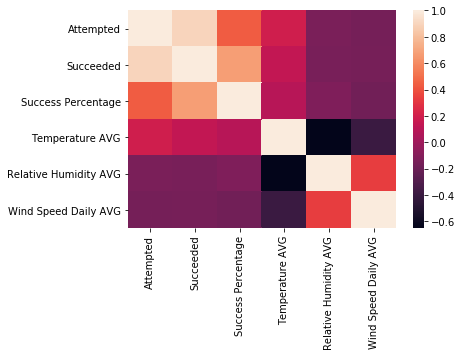

In [340]:
import seaborn as sns
sns.heatmap(new_df.corr())

In [341]:

########## code for MLP ##############
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)########### select input for poly features#########################

poly2_train=poly.fit_transform(x_train)
poly2_test=poly.fit_transform(x_test)



def neural_network_train(training_x, training_y, test_x, test_y):
################ select number of neurons ,here its 8 ###################################
    reg = MLPRegressor(hidden_layer_sizes=(8, ), activation='relu', solver='lbfgs', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=1, power_t=0.5, max_iter=40000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
    reg.fit(training_x, training_y)
    pred_y_test = reg.predict(test_x)
    pred_y_train = reg.predict(training_x)
    rmse_mlp_test=(np.sqrt(metrics.mean_squared_error(test_y,pred_y_test)))
    rmse_mlp_train=(np.sqrt(metrics.mean_squared_error(training_y,pred_y_train)))






    # # Visualization for subset of features
    # selectedFeatures = [0,1] # You can change the pair of features for visualization here. E.g. [0,1] for Economy and Health
    # reg.fit(training_x[training_x.columns[selectedFeatures]], np.ravel(training_y))
    # test_selectedX = test_x[test_x.columns[selectedFeatures]]
    
    # fig = plt.figure()
    # ax = fig.gca(projection='3d')  
    
    # # Find graph borders
    # xD = x[test_selectedX.columns[[0]]]
    # yD = x[test_selectedX.columns[[1]]]
    # # Grid.
    # X = np.linspace(np.min(xD), np.max(xD), 20)
    # Y = np.linspace(np.min(yD), np.max(yD), 20)
    # X, Y = np.meshgrid(X, Y)
    # Z = reg.predict( pd.DataFrame(data = np.array([X, Y]).reshape(2, -1).T))
    
    # # For transparent surface
    # theCM = cm.hot;
    # theCM._init()
    # alphas = np.abs(np.linspace(0.5, 0.5, theCM.N))
    # theCM._lut[:-3,-1] = alphas
    
    # # Plot the surface.
    # ax.plot_surface(X, Y, Z.reshape(20,20),rstride=1, cstride=1, cmap=theCM, edgecolor='none',linewidth=1, antialiased=False)
    # ax.scatter(test_selectedX[test_selectedX.columns[[0]]],test_selectedX[test_selectedX.columns[[1]]], test_y)
    
    # # Customize the z axis.
    # ax.zaxis.set_major_locator(LinearLocator(10))
    # ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    # ax.view_init(25, -20)

    # feats = ['Temperature','Humidity','Wind']
    # ax.set_xlabel(feats[selectedFeatures[0]])
    # ax.set_ylabel(feats[selectedFeatures[1]])
    # ax.set_zlabel('Success Rate')
    # ax.set_title(feats[selectedFeatures[0]] + ', ' + feats[selectedFeatures[1]] + ' vs Success Rate');
    # plt.tight_layout()
    # plt.show()

    return(rmse_mlp_test,rmse_mlp_train)

errors=neural_network_train(poly2_train,y_train,poly2_test,y_test)


print("The Mean Squared error for Multi Layer Perceptron Regressor is (Test Error,Train Error): ",errors)

The Mean Squared error for Multi Layer Perceptron Regressor is (Test Error,Train Error):  (0.40061611561462657, 0.3755284339303926)
